In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

C:\Users\Нур\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Нур\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Нур\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load Data

In [3]:
df = pd.read_excel('spam_ru.xlsx')

In [4]:
df.head(5)

,v1,v2
0,1,"Как новое, но не за все деньги 😊 Техника тольк..."
1,1,"Успейте купить то, что давно хотели! Flip.kz В..."
2,0,"Иди до точки Джуронг, сумасшедший.. Доступно т..."
3,0,"Ладно, Лар... Шучу с тобой, они..."
4,1,Бесплатный вход в 2 еженедельных соревнованиях...


# Visualiization Data

In [5]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2219,0,"* У вас будет еще две коробки, и я очень довол..."
1317,0,"Когда бы тебе ни было грустно, Когда бы ты ни ..."
4480,0,Эрутупалам Тандиячу
2690,0,"Да, я знаю веселые песенки из снеговика Фрости :)"
4707,0,Ух ты какой здоровый. Улица старого аэропорта....


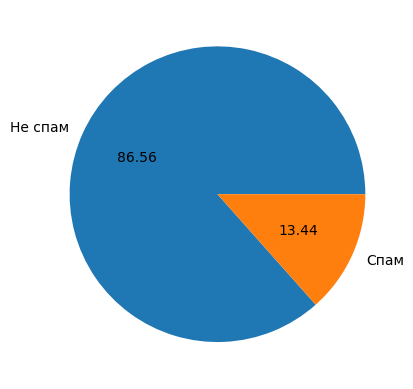

In [6]:
plt.pie(df['target'].value_counts(), labels=['Не спам','Спам'],autopct="%0.2f")
plt.show()

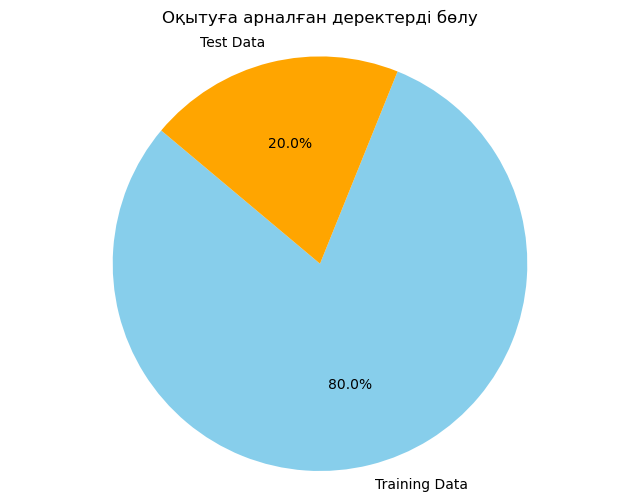

In [7]:
# Data for plotting
labels = ['Training Data', 'Test Data']
sizes = [4458, 1114]
colors = ['skyblue', 'orange']

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Оқытуға арналған деректерді бөлу')
plt.show()

In [8]:
df['num_characters'] = df['text'].apply(len)

In [9]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [10]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [11]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5574.000000,5574.000000,5574.000000
mean,93.668820,19.262289,2.033369
std,73.580462,14.397142,1.515740
min,3.000000,1.000000,1.000000
25%,39.000000,9.000000,1.000000
50%,68.000000,15.000000,2.000000
75%,138.000000,28.000000,3.000000
max,983.000000,211.000000,28.000000


In [12]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.00000,4825.000000,4825.000000
mean,78.97658,17.268187,1.826736
std,65.24339,14.069649,1.399268
min,3.00000,1.000000,1.000000
25%,36.00000,8.000000,1.000000
50%,58.00000,13.000000,1.000000
75%,103.00000,22.000000,2.000000
max,983.00000,211.000000,28.000000


In [13]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,749.000000,749.000000,749.000000
mean,188.315087,32.108144,3.364486
std,50.231545,8.763091,1.562211
min,13.000000,2.000000,1.000000
25%,168.000000,28.000000,2.000000
50%,197.000000,33.000000,3.000000
75%,219.000000,37.000000,4.000000
max,608.000000,101.000000,8.000000


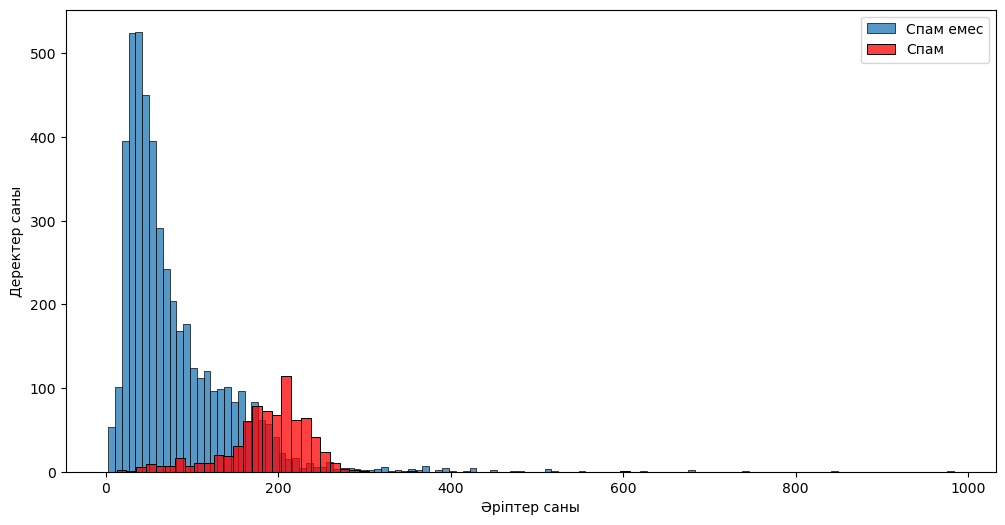

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.xlabel("Әріптер саны")
plt.ylabel("Деректер саны")
plt.legend(["Спам емес",'Спам'])

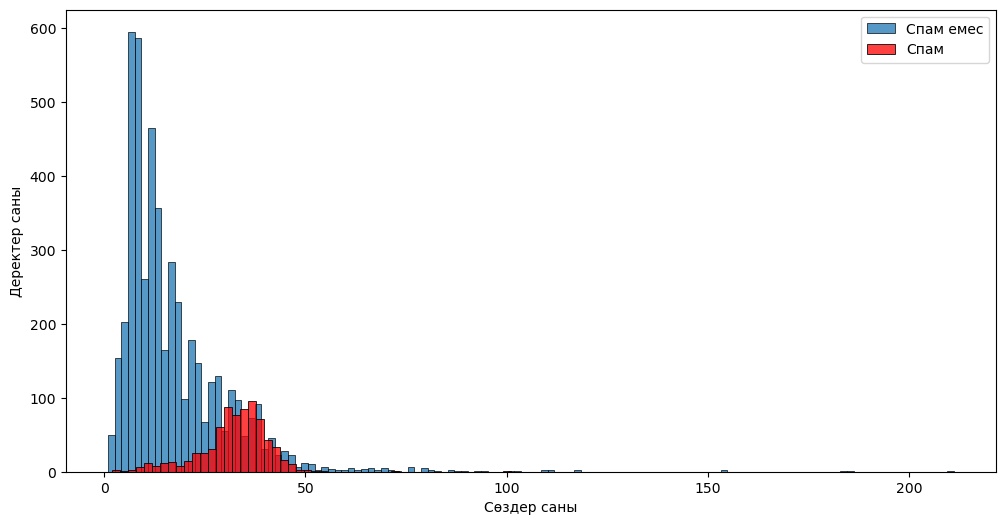

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.xlabel("Сөздер саны")
plt.ylabel("Деректер саны")
plt.legend(["Спам емес",'Спам'])

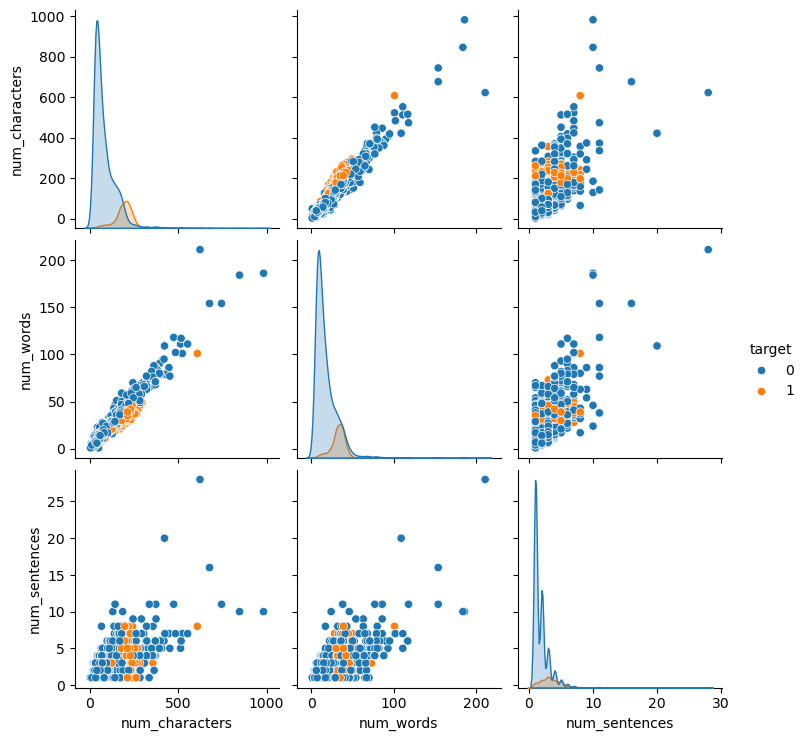

In [16]:
sns.pairplot(df,hue='target')

# 3. Data Preprocessing


In [17]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
import re

# Создаем объект стеммера для русского языка
stemmer = SnowballStemmer("russian")

def transform_text(text):
    # Преобразуем текст в нижний регистр
    text = text.lower()
    # Токенизируем текст
    text = nltk.word_tokenize(text)
    
    # Удаляем слова, содержащие не русские символы или цифры
    filtered_words = [word for word in text if re.fullmatch(r'[а-яё]+', word)]
    
    # Удаляем стоп-слова и применяем стемминг
    stemmed_words = [stemmer.stem(word) for word in filtered_words if word not in stopwords.words('russian')]
            
    # Возвращаем обработанный текст в виде строки
    return " ".join(stemmed_words)

# Пример использования функции
sample_text = "Этот текст 2023 года включает числа 100 и слова на русском и English."
transformed_text = transform_text(sample_text)
print(transformed_text)


текст год включа числ слов русск


In [18]:
df['transformed_text'] = df['text'].apply(transform_text)

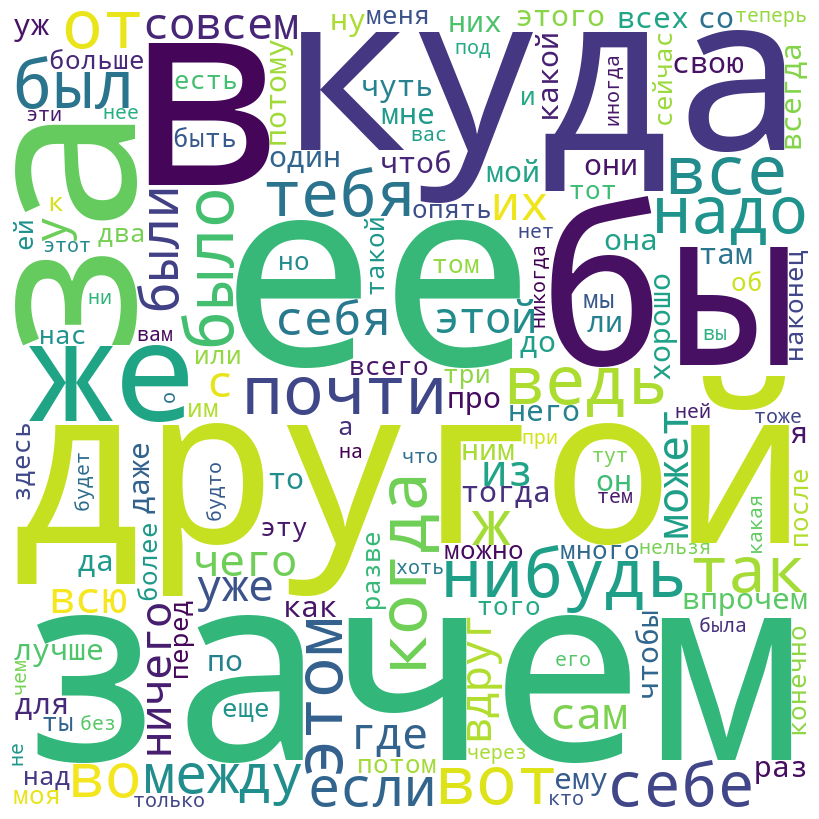

In [19]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Загрузка списка стоп-слов
stop_words = set(stopwords.words('russian'))  # Пример для русского языка

# Проверка, действительно ли список стоп-слов не пустой
if stop_words:
    # Создание строки из списка стоп-слов
    text = ' '.join(stop_words)

    # Создание облака слов
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

    # Визуализация облака слов
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()
else:
    print("Список стоп-слов пуст. Проверьте загрузку списка стоп-слов из NLTK.")


In [20]:
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='white')

In [21]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

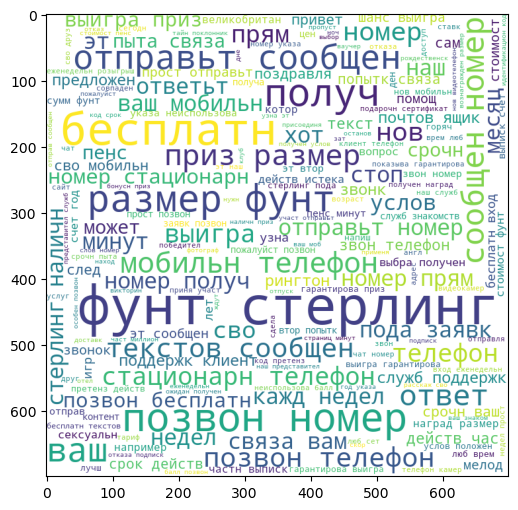

In [22]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

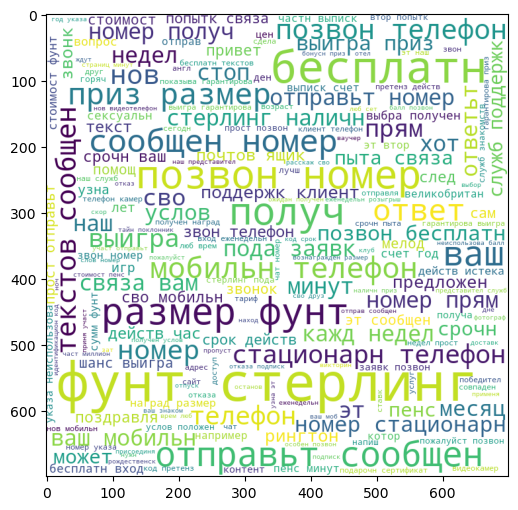

In [23]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [24]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\Users\Нур\AppData\Local\Temp\ipykernel_7328\122821674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=words_df, palette='Spectral')


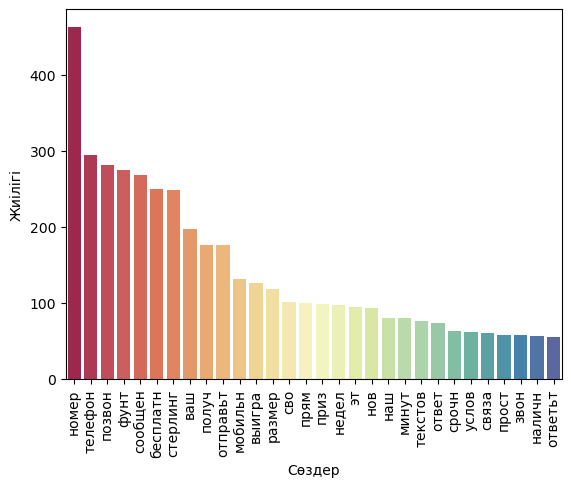

In [25]:
from collections import Counter
words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Использование seaborn для построения графика
sns.barplot(x='Word', y='Frequency', data=words_df, palette='Spectral')
plt.xlabel("Сөздер")
plt.ylabel("Жиілігі")
plt.xticks(rotation='vertical')
plt.show()

In [26]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\Нур\AppData\Local\Temp\ipykernel_7328\2593058130.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=words_df, palette='Spectral')


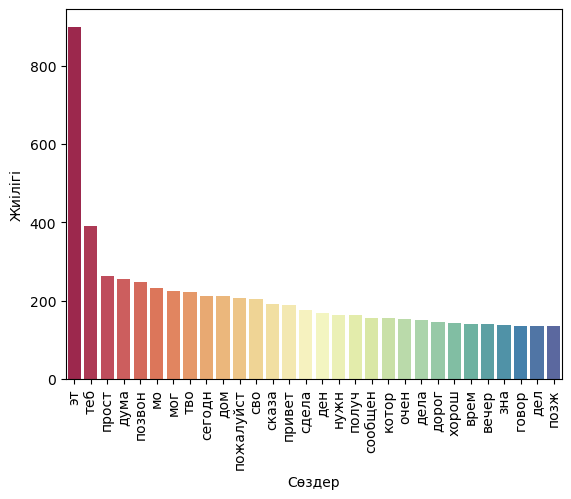

In [27]:
words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=words_df, palette='Spectral')
plt.xlabel("Сөздер")
plt.ylabel("Жиілігі")
plt.xticks(rotation='vertical')
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [29]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [56]:
import joblib
joblib.dump(tfidf, 'tfidf.joblib')

['tfidf.joblib']

In [30]:
y = df['target'].values

In [31]:
# Получение списка слов
feature_names = tfidf.get_feature_names_out()

# Создание DataFrame
word_column_mapping = pd.DataFrame({'Сөз': feature_names, 'Индексі': range(len(feature_names))})

# Вывод таблицы
word_column_mapping[:]

,Сөз,Индексі
0,аа,0
1,аат,1
2,аб,2
3,абиол,3
4,абонемент,4
...,...,...
2995,январ,2995
2996,яр,2996
2997,ярк,2997
2998,ясн,2998


In [32]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
h=0
for i in df.transformed_text:
    if "абонемент" in i:
        print("h:",h,end='  ')
        print(i)
    h+=1     

h: 58  поздравля специальн абонемент кин год дво ваш позвон номер прям бесплатн пропуст
h: 493  поздравля специальн абонемент кин год дво ваш позвон номер прям бесплатн пропуст
h: 2301  поздравля специальн абонемент кин год дво ваш позвон номер прям бесплатн пропуст


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
h=0
for i in pd.DataFrame(X)[58]:
    if i!=0:
        print(i,":",h)
    h+=1

0.6785773376950881 : 202
0.6065722851902514 : 1410
0.22701245368040174 : 2946
0.44239024713083674 : 3344
0.39452316669220194 : 4433
0.3630557920872084 : 5304


In [36]:
pd.DataFrame(X)[58][5304]

0.3630557920872084

In [37]:
pd.DataFrame(word_column_mapping.iloc[1463])

,1463
Сөз,ойк
Индексі,1463


In [38]:
pd.DataFrame(X)[0][1463]

0.4935863312309216

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=2)
rfc.fit(X_train, y_train)
import joblib
joblib.dump(rfc, 'rfc.joblib')

['rfc.joblib']

In [42]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [44]:
import joblib
joblib.dump(rfc, 'rfc.joblib')

['rfc.joblib']

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Инициализация моделей
svc = SVC(random_state=2)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(random_state=2)
lrc = LogisticRegression(random_state=2)
rfc = RandomForestClassifier(random_state=2)
xgb = XGBClassifier(random_state=2)

# Параметры для GridSearch
param_grid = {
    'SVC': {'kernel': ['linear', 'sigmoid'], 'gamma': [1e-3,  1.0], 'C': [0.1, 1]},
    'KN': {'n_neighbors': [3, 5, 7, 9]},
    'NB': {},  # MultinomialNB обычно имеет небольшое количество параметров для настройки
    'DT': {'max_depth': [3, 5, 7, 9], 
           'min_samples_split': [2, 4, 6],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4]},
    'LR': {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear']},
    'RF': {'n_estimators': [10, 50, 100], 
           'max_features': ['sqrt', 'log2'],
           'max_depth': [10, 20, 30, 40, 50 ], 
           'min_samples_leaf': [1, 2, 4], 
           'min_samples_split': [2, 5, 10],},
    'XGB': {'n_estimators': [30, 50, 100], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

# Словарь классификаторов
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'XGB': xgb
}


# Словарь для хранения лучших классификаторов
best_clfs = {}

accuracy_scores = []
precision_scores = []

# Обучение моделей с помощью Grid Search
print("Learning Started")
for name, clf in clfs.items():
    print("#",name)
    if param_grid[name]:
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grid[name], scoring='accuracy', cv=5,n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_
    else:
        best_clf = clf
        best_clf.fit(X_train, y_train)

    best_clfs[name] = best_clf

    y_pred = best_clf.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred)
    current_precision = precision_score(y_test, y_pred, average='macro')  # Использование average='macro' для мультиклассовой классификации

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
    print(f"Лучшие параметры для {name}: {grid_search.best_params_ if param_grid[name] else 'N/A'}")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")

# Создание DataFrame для сравнения результатов
performance_df = pd.DataFrame({
    'Algorithm': best_clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

print(performance_df)

Learning Started
# SVC


KeyboardInterrupt: 

In [ ]:
performance_df

C:\Users\Нур\AppData\Local\Temp\ipykernel_16624\1271084703.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Algorithm', data=performance_df, ax=ax[0], palette='viridis')
C:\Users\Нур\AppData\Local\Temp\ipykernel_16624\1271084703.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precision', y='Algorithm', data=performance_df, ax=ax[1], palette='viridis')


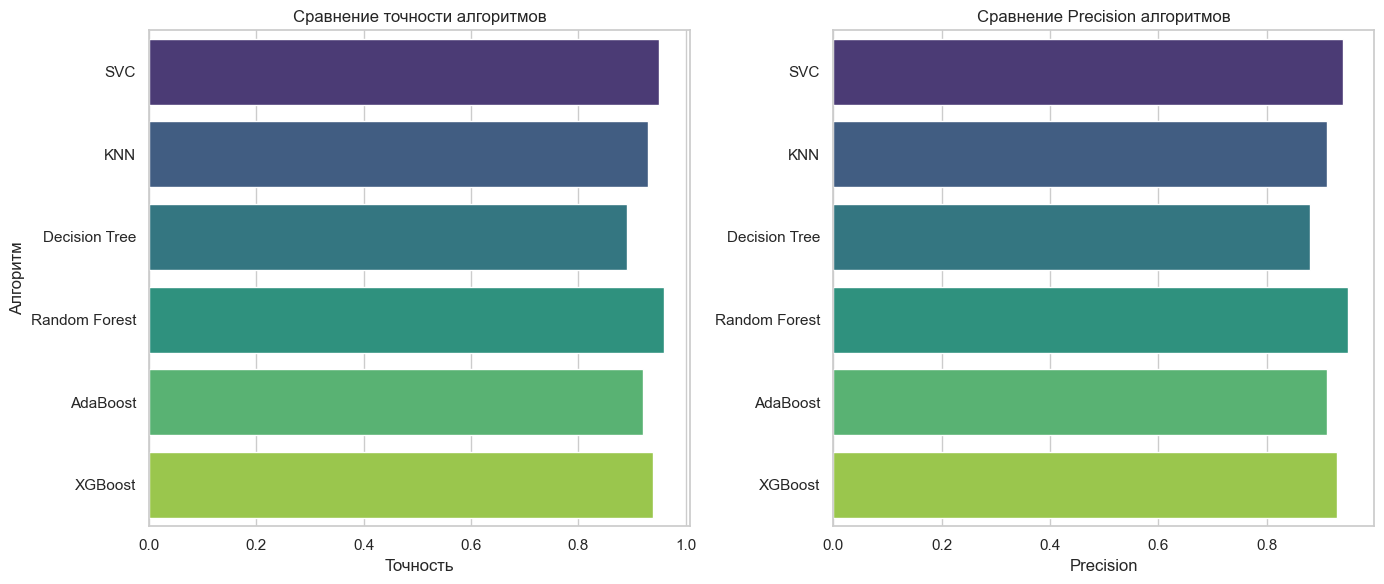

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Допустим, у нас есть DataFrame с результатами, назовем его performance_df
# Этот DataFrame содержит колонки 'Algorithm', 'Accuracy', 'Precision'

# Создаем DataFrame для примера
data = {
    'Algorithm': ['SVC', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost'],
    'Accuracy': [0.95, 0.93, 0.89, 0.96, 0.92, 0.94],
    'Precision': [0.94, 0.91, 0.88, 0.95, 0.91, 0.93]
}
performance_df = pd.DataFrame(data)

# Настройка внешнего вида с помощью Seaborn
sns.set(style="whitegrid")

# Создание графиков
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# График точности
sns.barplot(x='Accuracy', y='Algorithm', data=performance_df, ax=ax[0], palette='viridis')
ax[0].set_title('Сравнение точности алгоритмов')
ax[0].set_xlabel('Точность')
ax[0].set_ylabel('Алгоритм')

# График Precision
sns.barplot(x='Precision', y='Algorithm', data=performance_df, ax=ax[1], palette='viridis')
ax[1].set_title('Сравнение Precision алгоритмов')
ax[1].set_xlabel('Precision')
ax[1].set_ylabel('')

# Отображение графика
plt.tight_layout()
plt.show()